## Plots bootstraps/toys for a set of directories

Sets of input directories are runs with different detector resolutions.

Will do the following:
- Calculate the model parameters (mu, sig2) using OmniFold output weighted events.
    - __Results__: mean mu, mean sig2, RMS mu, RMS sig2
- Read unbinned ML fit results (for about 50 samples) 
    - __Results__: ave fit error for mu and sig2
- Make histogram of OmniFold output and compute covariance matrix for histogram from set of samples
- Run chi2 fit of histogram using full covariance matrix
    - __Results__: mean mu, mean sig2, ave fit err mu, ave fit err sig2, RMS of fit mu, RMS of fit sig2
- Run chi2 fit of histogram using only diagonal elements of covariance matrix
    - __Results__: mean mu, mean sig2, ave fit err mu, ave fit err sig2, RMS of fit mu, RMS of fit sig2


Summary tables and plots will have
- 3 types of inference mean for each model parameter (mu, sig2):  ML/simple calc, chi2 fit full cov, chi2 fit diag cov.
- 3 types of asymptotic error for each model parameter: unbinned ML fit, chi2 fit full cov, chi2 fit diag cov.
- 3 types of RMS of inference values for each model parameter: ML/simple calc, chi2 fit full cov, chi2 fit diag cov.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special


import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl



import iminuit
from iminuit import Minuit
import scipy.stats as stats
from scipy.stats import chi2



/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
n_input_dirs = 8

n_pars = 2

par_names = [ 'mu', 'sig2' ]

#input_dirs = np.array([
#    'hist-pdf-toy-study-1d-1a-perfect',
#    'hist-pdf-toy-study-1d-1a-goodres',
#    'hist-pdf-toy-study-1d-1a-nominal-resolution',
#    'hist-pdf-toy-study-1d-1b-mediumbad',
#    'bootstrap-toy-study8a-1d-1d-perfect',
#    'bootstrap-toy-study8a-1d-1d-goodres',
#    'bootstrap-toy-study8a-1d-1d-nominal-resolution',
#    'bootstrap-toy-study8a-1d-1d-mediumbad',
#])

input_names = np.array([
    'Simple PDF, perfect det. res.',
    'Simple PDF, good det. res.',
    'Simple PDF, nominal det. res.',
    'Simple PDF, bad det. res.',
    'Neural Network, perfect det. res.',
    'Neural Network, good det. res.',
    'Neural Network, nominal det. res.',
    'Neural Network, bad det. res.',
])

input_det_res = np.array([
    0.0,
    0.25,
    0.50,
    0.75,
    0.0,
    0.25,
    0.50,
    0.75,
])

input_lhr_type = np.array([
    'Simple PDF',
    'Simple PDF',
    'Simple PDF',
    'Simple PDF',
    'Neural Network',
    'Neural Network',
    'Neural Network',
    'Neural Network',
])


n_inference_types = 3

inference_names = np.array([
    'Unbinned ML fit',
    'chi2 fit, full cov.',
    'chi2 fit, diag. cov.',
])


#results_inference_mean = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )

#results_fit_err = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )

#results_rms = np.zeros( shape=(n_input_dirs, n_inference_types, n_pars) )



inference_color = np.array([
    'b','coral','g'
])




In [3]:
infile = 'inference-analysis-results-10k-100k.npy'

#infile = 'inference-analysis-results-10k-100k-rcond-0.001-diag-1.npy'

with open( infile, 'rb' ) as f :
            results_inference_mean = np.load(f, allow_pickle=True )
            results_fit_err = np.load(f, allow_pickle=True )
            results_rms = np.load(f, allow_pickle=True )
            results_inference_mean_stat_err = np.load(f, allow_pickle=True )
            results_fit_err_stat_err = np.load(f, allow_pickle=True )
            results_rms_stat_err = np.load(f, allow_pickle=True )

In [4]:
input_names[input_lhr_type == 'Simple PDF']

array(['Simple PDF, perfect det. res.', 'Simple PDF, good det. res.',
       'Simple PDF, nominal det. res.', 'Simple PDF, bad det. res.'],
      dtype='<U33')

In [5]:
results_inference_mean[:,0,0][input_lhr_type == 'Simple PDF']

array([0.20026573, 0.19842436, 0.19959532, 0.20171016])

In [6]:
results_inference_mean[:,0,0][input_lhr_type == 'Neural Network']

array([0.19975565, 0.20026437, 0.19979314, 0.19771217])

## Versions that include stat uncertainty error bars

<function matplotlib.pyplot.show(close=None, block=None)>

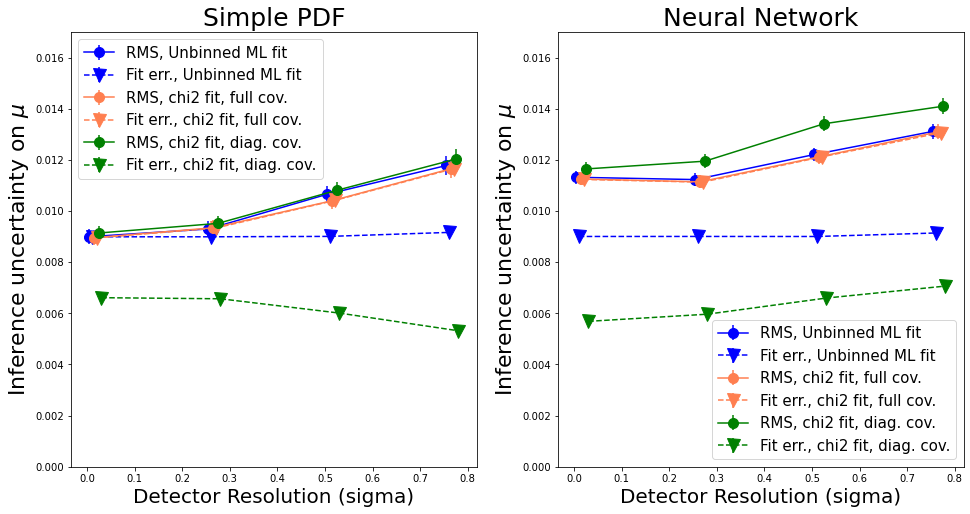

In [7]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))





pi = 0

amask = input_lhr_type == 'Simple PDF'

axi = ax[0]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    
amask = input_lhr_type == 'Neural Network'
    
axi = ax[1]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    
ax[0].set_ylim([0.0,0.017])
ax[1].set_ylim([0.0,0.017])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference uncertainty on $\mu$', fontsize=22)
ax[1].set_ylabel('Inference uncertainty on $\mu$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

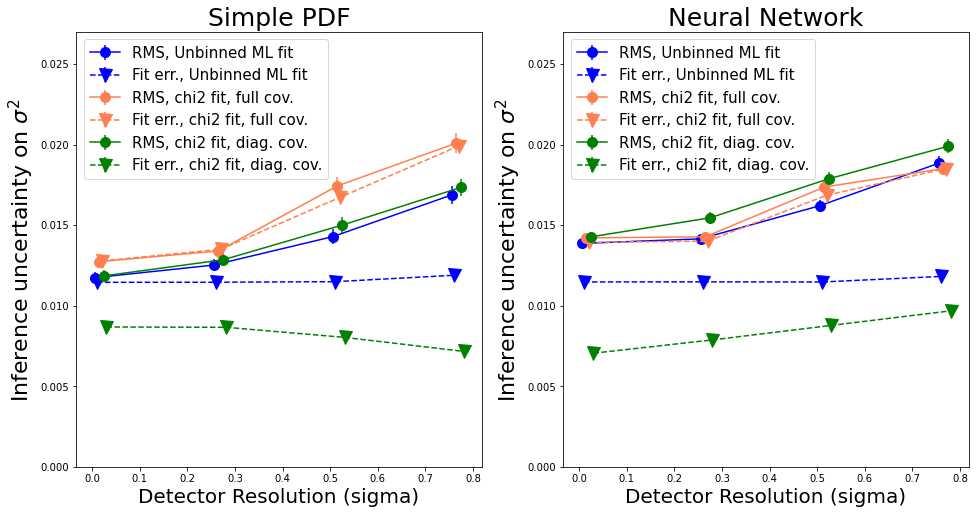

In [8]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))





pi = 1

amask = input_lhr_type == 'Simple PDF'

axi = ax[0]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    
amask = input_lhr_type == 'Neural Network'
    
axi = ax[1]

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = 'RMS, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms[amask][:,it,pi], 
                 results_rms_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=10,
            label=plabel )
    
    xshift += 0.005
    plabel = 'Fit err., %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_fit_err[amask][:,it,pi],
             results_fit_err_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='--', marker='v', markersize=13,
            label=plabel )


    
ax[0].set_ylim([0.0,0.027])
ax[1].set_ylim([0.0,0.027])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference uncertainty on $\sigma^2$', fontsize=22)
ax[1].set_ylabel('Inference uncertainty on $\sigma^2$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)


plt.show

In [9]:
results_inference_mean.shape

(8, 3, 2)

In [10]:

print('\n\n')

for pi in range( results_inference_mean.shape[2]) :
    
    print(' ======= pi %d : %s' % (pi, par_names[pi]))
    
    for iti in range( results_inference_mean.shape[1] ) :
        
        print('   iti %d : %s' % (iti, inference_names[iti]))

        for di in range( results_inference_mean.shape[0] ) :
            
            print(' %2d, %2d, %3d : ' % (pi, iti, di), end='' )
            
            print(' %15s ,' % (input_lhr_type[di]), end='')
        
            print(' res = %.2f, ' % (input_det_res[di]), end='')
            
            print(' ave = %7.4f, ' % (results_inference_mean[di,iti,pi]), end='')
            
            print(' RMS = %7.4f, ' % (results_rms[di,iti,pi]), end='')
            
            print(' fit err. = %7.4f, ' % (results_fit_err[di,iti,pi]), end='')
            
            print()
        
        
        print()




 ======= pi 0 : mu
   iti 0 : Unbinned ML fit
  0,  0,   0 :       Simple PDF , res = 0.00,  ave =  0.2003,  RMS =  0.0090,  fit err. =  0.0090, 
  0,  0,   1 :       Simple PDF , res = 0.25,  ave =  0.1984,  RMS =  0.0093,  fit err. =  0.0090, 
  0,  0,   2 :       Simple PDF , res = 0.50,  ave =  0.1996,  RMS =  0.0107,  fit err. =  0.0090, 
  0,  0,   3 :       Simple PDF , res = 0.75,  ave =  0.2017,  RMS =  0.0118,  fit err. =  0.0092, 
  0,  0,   4 :   Neural Network , res = 0.00,  ave =  0.1998,  RMS =  0.0113,  fit err. =  0.0090, 
  0,  0,   5 :   Neural Network , res = 0.25,  ave =  0.2003,  RMS =  0.0112,  fit err. =  0.0090, 
  0,  0,   6 :   Neural Network , res = 0.50,  ave =  0.1998,  RMS =  0.0122,  fit err. =  0.0090, 
  0,  0,   7 :   Neural Network , res = 0.75,  ave =  0.1977,  RMS =  0.0131,  fit err. =  0.0091, 

   iti 1 : chi2 fit, full cov.
  0,  1,   0 :       Simple PDF , res = 0.00,  ave =  0.1994,  RMS =  0.0090,  fit err. =  0.0090, 
  0,  1,   1 :     

<function matplotlib.pyplot.show(close=None, block=None)>

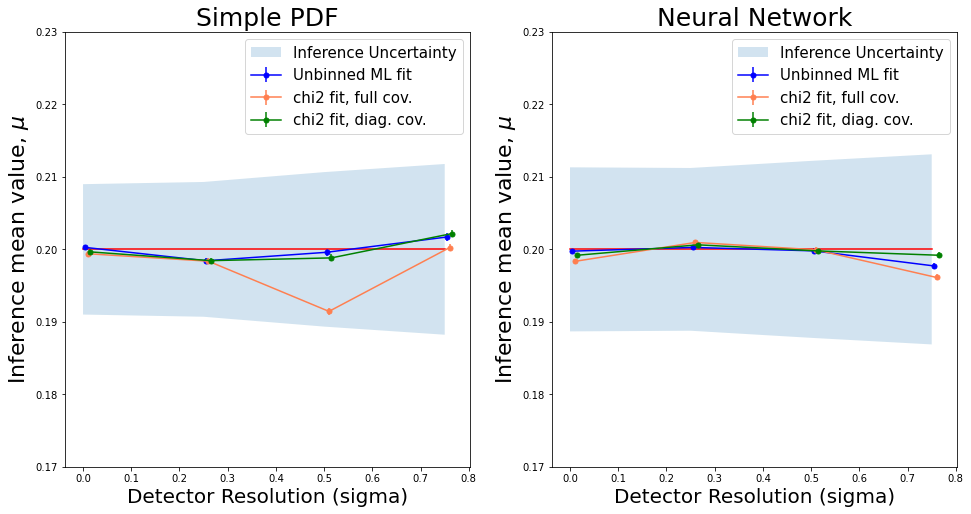

In [11]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))


true_plus_rms = 0.20 + results_rms
true_minus_rms = 0.20 - results_rms


pi = 0

amask = input_lhr_type == 'Simple PDF'

axi = ax[0]

it=0
axi.fill_between( input_det_res[amask], 
                 true_minus_rms[amask][:,it,pi], true_plus_rms[amask][:,it,pi], 
                 alpha=0.2, label='Inference Uncertainty'  )

xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = '%s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_inference_mean[amask][:,it,pi], 
                 results_inference_mean_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='-', marker='o', markersize=5,
            label=plabel )

axi.plot( input_det_res[amask], 0.20*np.ones(len(input_det_res[amask])), color='r')





amask = input_lhr_type == 'Neural Network'
    
axi = ax[1]

it=0
axi.fill_between( input_det_res[amask], 
                 true_minus_rms[amask][:,it,pi], true_plus_rms[amask][:,it,pi], 
                 alpha=0.2, label='Inference Uncertainty'  )


xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = '%s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_inference_mean[amask][:,it,pi], 
                 results_inference_mean_stat_err[amask][:,it,pi],
             color=inference_color[it], linestyle='-', marker='o', markersize=5,
            label=plabel )
   
axi.plot( input_det_res[amask], 0.20*np.ones(len(input_det_res[amask])), color='r')
    

ax[0].set_ylim([0.17,0.23])
ax[1].set_ylim([0.17,0.23])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference mean value, $\mu$', fontsize=22)
ax[1].set_ylabel('Inference mean value, $\mu$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)


    


plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

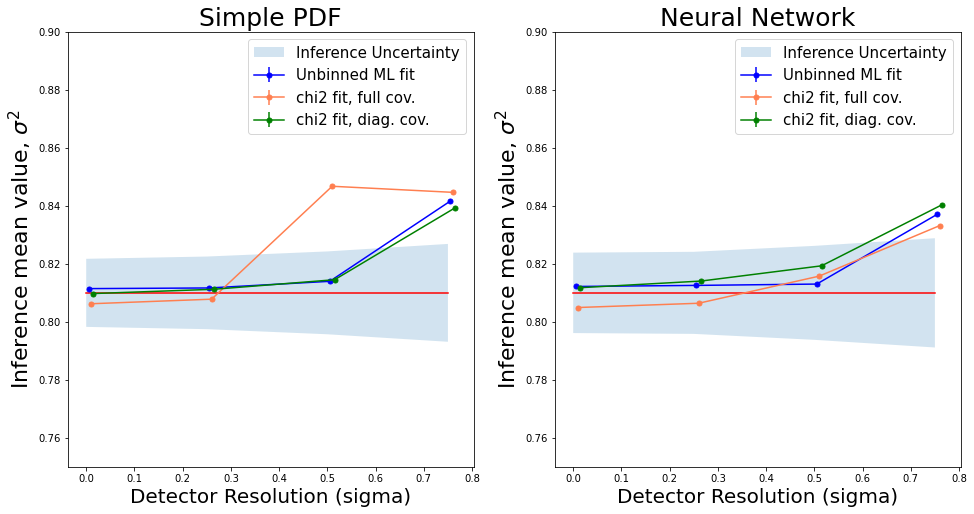

In [12]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))



true_plus_rms = 0.81 + results_rms
true_minus_rms = 0.81 - results_rms



pi = 1

amask = input_lhr_type == 'Simple PDF'

axi = ax[0]

it=0
axi.fill_between( input_det_res[amask], 
                 true_minus_rms[amask][:,it,pi], true_plus_rms[amask][:,it,pi], 
                 alpha=0.2, label='Inference Uncertainty'  )


xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = '%s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_inference_mean[amask][:,it,pi], 
                 results_inference_mean_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=5,
            label=plabel )

axi.plot( input_det_res[amask], 0.81*np.ones(len(input_det_res[amask])), color='r')






amask = input_lhr_type == 'Neural Network'
    
axi = ax[1]

it=0
axi.fill_between( input_det_res[amask], 
                 true_minus_rms[amask][:,it,pi], true_plus_rms[amask][:,it,pi], 
                 alpha=0.2, label='Inference Uncertainty'  )


xshift = 0

for it in range( n_inference_types ) :
    
    xshift += 0.005
    plabel = '%s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_inference_mean[amask][:,it,pi], 
             results_inference_mean_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=5,
            label=plabel )
   
axi.plot( input_det_res[amask], 0.81*np.ones(len(input_det_res[amask])), color='r')
    

ax[0].set_ylim([0.75,0.90])
ax[1].set_ylim([0.75,0.90])


ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_ylabel('Inference mean value, $\sigma^2$', fontsize=22)
ax[1].set_ylabel('Inference mean value, $\sigma^2$', fontsize=22)

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_title('Simple PDF', fontsize=25)
ax[1].set_title('Neural Network', fontsize=25)


    


plt.show

In [13]:
results_rms_over_fit_err = results_rms / results_fit_err
results_rms_over_fit_err_stat_err = results_rms_stat_err / results_fit_err

In [14]:
results_rms_over_fit_err

array([[[1.00048467, 1.02500524],
        [1.00072068, 0.99649533],
        [1.38249059, 1.36575765]],

       [[1.03407386, 1.09301486],
        [1.00114362, 0.99234188],
        [1.44865113, 1.48338438]],

       [[1.18328744, 1.2430349 ],
        [0.99911533, 1.04280046],
        [1.79878843, 1.86712398]],

       [[1.28551927, 1.41924565],
        [0.99990488, 1.00904143],
        [2.26247681, 2.42094618]],

       [[1.25701162, 1.20866294],
        [1.00162016, 1.01993627],
        [2.04772032, 2.02485705]],

       [[1.24682997, 1.23271334],
        [1.00101759, 1.01890166],
        [2.00266288, 1.96218263]],

       [[1.35600023, 1.41237093],
        [1.00023543, 1.03017931],
        [2.03272704, 2.03719925]],

       [[1.43506583, 1.59430439],
        [1.00272404, 1.00002713],
        [1.99515545, 2.05574953]]])

(0.9, 1.9)

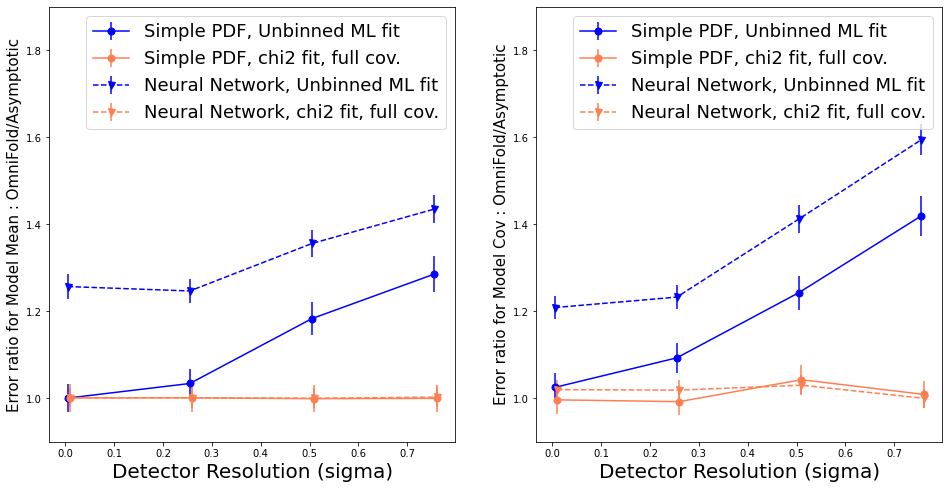

In [15]:
fig,ax = plt.subplots( 1, 2, figsize=(2*8,8))


pi = 0


axi = ax[0]

amask = input_lhr_type == 'Simple PDF'

xshift = 0

for it in range( n_inference_types-1 ) :
    
    xshift += 0.005
    plabel = 'Simple PDF, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms_over_fit_err[amask][:,it,pi], 
             results_rms_over_fit_err_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=7,
            label=plabel )

amask = input_lhr_type == 'Neural Network'

xshift = 0

for it in range( n_inference_types-1 ) :
    
    xshift += 0.005
    plabel = 'Neural Network, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms_over_fit_err[amask][:,it,pi], 
             results_rms_over_fit_err_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='--', marker='v', markersize=7,
            label=plabel )

    
    
    
#--

pi = 1


axi = ax[1]

amask = input_lhr_type == 'Simple PDF'

xshift = 0

for it in range( n_inference_types-1 ) :
    
    xshift += 0.005
    plabel = 'Simple PDF, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms_over_fit_err[amask][:,it,pi], 
             results_rms_over_fit_err_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='-', marker='o', markersize=7,
            label=plabel )

amask = input_lhr_type == 'Neural Network'

xshift = 0

for it in range( n_inference_types-1 ) :
    
    xshift += 0.005
    plabel = 'Neural Network, %s' % inference_names[it]
    axi.errorbar( input_det_res[amask]+xshift, results_rms_over_fit_err[amask][:,it,pi], 
             results_rms_over_fit_err_stat_err[amask][:,it,pi], 
             color=inference_color[it], linestyle='--', marker='v', markersize=7,
            label=plabel )


ax[0].legend( fontsize=18, loc='best')
ax[1].legend( fontsize=18, loc='best')

ax[0].set_xlabel('Detector Resolution (sigma)', fontsize=20)
ax[1].set_xlabel('Detector Resolution (sigma)', fontsize=20)

ax[0].set_ylabel('Error ratio for Model Mean : OmniFold/Asymptotic', fontsize=15)
ax[1].set_ylabel('Error ratio for Model Cov : OmniFold/Asymptotic', fontsize=15)

ax[0].set_ylim([0.9,1.9])
ax[1].set_ylim([0.9,1.9])